# Regularization Part-2 (Ridge-Lasso)

## Import libraries and Read Dataset

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

In [77]:
df = pd.read_csv("https://raw.githubusercontent.com/msddk/DS_Bootcamp/main/Machine%20Learning/Linear%20Regression/Advertising.csv")

In [78]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [79]:
df.shape

(200, 4)

In [80]:
X = df.drop("sales", axis =1)
y = df["sales"]

In [81]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


## Polynomial Features

In [82]:
from sklearn.preprocessing import PolynomialFeatures

We will create an artificial overfitting case by using the degree as 5.

In [83]:
polynomial_converter = PolynomialFeatures(degree=5, include_bias=False)

poly_features = polynomial_converter.fit_transform(X)

In [84]:
poly_features.shape

(200, 55)

### Train | Test Split

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

### Scaling the Data

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [88]:
scaler.fit(X_train)

StandardScaler()

In [89]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Ridge Regression

In [90]:
from sklearn.linear_model import Ridge

In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [92]:
ridge_model = Ridge(alpha=1, random_state=42)

In [93]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [94]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [95]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.986677,0.981571
mae,0.359835,0.577455
mse,0.349619,0.503204
rmse,0.591286,0.709369


### Cross Validation (alpha = 1) 

In [96]:
from sklearn.model_selection import cross_validate

In [97]:
model = Ridge(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [98]:
pd.DataFrame(scores, index = range(1, 6)).iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.986229,-0.415847,-0.281854,-0.530899
2,0.967280,-0.512454,-0.828871,-0.910424
3,0.983998,-0.369903,-0.459725,-0.678030
4,0.991258,-0.456869,-0.279888,-0.529044
5,0.923559,-0.577272,-1.596358,-1.263471


In [99]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             0.970465
test_neg_mean_absolute_error       -0.466469
test_neg_mean_squared_error        -0.689339
test_neg_root_mean_squared_error   -0.782374
dtype: float64

In [100]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

,ridge_train,ridge_test
R2,0.986677,0.981571
mae,0.359835,0.577455
mse,0.349619,0.503204
rmse,0.591286,0.709369


In [101]:
ridge_model.coef_

array([ 3.70189348,  0.67436201,  0.2515743 , -0.8451356 ,  2.41349249,
        0.13149876,  0.02993339,  0.14799605, -0.08172587, -1.02187237,
       -0.01427425, -0.74852659,  1.1971867 ,  0.01145098,  0.07349349,
       -0.24661321,  0.07978967, -0.10138056,  0.00513449, -0.34699792,
       -0.02391804, -0.27315099, -0.33264948, -0.14203621, -0.08585407,
        0.65075131, -0.22101997, -0.03358708,  0.09744789, -0.29424659,
        0.12649283, -0.00858427, -0.03555111,  0.03725412,  0.36903777,
        0.40047486,  0.38709038, -0.16862286,  0.31930177,  0.22979604,
       -0.52443171, -0.09345824,  0.19580071,  0.02377938,  0.34795393,
       -0.30116278, -0.0705506 ,  0.03853707, -0.08501767, -0.22452672,
        0.20449723,  0.10424153,  0.02788033, -0.03877529, -0.10517745])

In [102]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])
rm_df

,ridge_coef_1
0,3.701893
1,0.674362
2,0.251574
3,-0.845136
4,2.413492
5,0.131499
6,0.029933
7,0.147996
8,-0.081726
9,-1.021872


### Choosing best alpha value by RidgeCV

In [103]:
from sklearn.linear_model import RidgeCV

In [104]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [105]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [106]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [107]:
ridge_cv_model.alpha_ 

0.02

In [108]:
#rmse for ridge with CV
ridge_cv_model.best_score_

-0.6896314656638609

In [109]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [110]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.993525,0.973656
mae,0.276813,0.482017
mse,0.169899,0.719325
rmse,0.412189,0.848130


In [111]:
pd.concat([rs, rcs], axis = 1)

,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.986677,0.981571,0.993525,0.973656
mae,0.359835,0.577455,0.276813,0.482017
mse,0.349619,0.503204,0.169899,0.719325
rmse,0.591286,0.709369,0.412189,0.848130


## Lasso Regression


In [112]:
from sklearn.linear_model import Lasso, LassoCV

In [113]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [114]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [115]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.914878,0.919497
mae,1.016025,1.063358
mse,2.233679,2.198110
rmse,1.494550,1.482602


In [116]:
pd.concat([rs, rcs, lss], axis = 1)

,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.986677,0.981571,0.993525,0.973656,0.914878,0.919497
mae,0.359835,0.577455,0.276813,0.482017,1.016025,1.063358
mse,0.349619,0.503204,0.169899,0.719325,2.233679,2.198110
rmse,0.591286,0.709369,0.412189,0.848130,1.494550,1.482602


### Cross Validation (alpha = 1) 

In [117]:
model = Lasso(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [118]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.003181,0.002027,0.946997,-0.739226,-1.084809,-1.041541
2,0.002921,0.001991,0.939742,-0.960813,-1.526471,-1.235505
3,0.001971,0.001730,0.883556,-1.342426,-3.345323,-1.829022
4,0.001193,0.001121,0.947743,-0.939477,-1.673125,-1.293493
5,0.001173,0.001039,0.814333,-1.173473,-3.877371,-1.969104


In [119]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             0.906474
test_neg_mean_absolute_error       -1.031083
test_neg_mean_squared_error        -2.301420
test_neg_root_mean_squared_error   -1.473733
dtype: float64

In [120]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,0.914878,0.919497
mae,1.016025,1.063358
mse,2.233679,2.198110
rmse,1.494550,1.482602


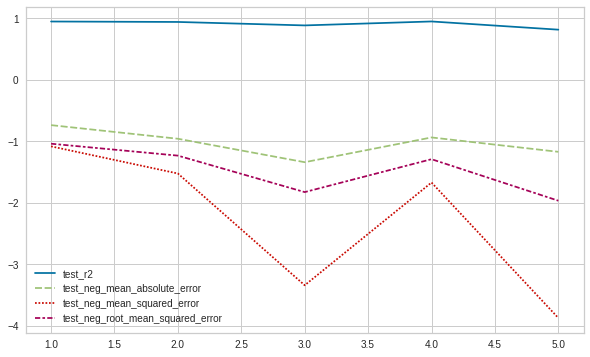

In [121]:
sns.lineplot(data = scores.iloc[:,2:])

In [122]:
lasso_model.coef_

array([0.66574769, 0.        , 0.        , 0.        , 3.50386079,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [123]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [124]:
pd.concat([rm_df, lsm_df], axis = 1)

,ridge_coef_1,lasso_coef_1
0,3.701893,0.665748
1,0.674362,0.000000
2,0.251574,0.000000
3,-0.845136,0.000000
4,2.413492,3.503861
5,0.131499,0.000000
6,0.029933,0.000000
7,0.147996,0.000000
8,-0.081726,0.000000
9,-1.021872,0.000000


### Choosing best alpha value by LassoCV

In [125]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42) 

In [126]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=100000, random_state=42)

In [127]:
lasso_cv_model.alpha_

0.01

In [128]:
y_pred = lasso_cv_model.predict(X_test_scaled)   #Lasso(alpha =0.01)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [129]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.987480,0.985852
mae,0.347294,0.503240
mse,0.328546,0.386314
rmse,0.573189,0.621542


In [130]:
pd.concat([rs, rcs, lss, lcs], axis = 1)

,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.986677,0.981571,0.993525,0.973656,0.914878,0.919497,0.987480,0.985852
mae,0.359835,0.577455,0.276813,0.482017,1.016025,1.063358,0.347294,0.503240
mse,0.349619,0.503204,0.169899,0.719325,2.233679,2.198110,0.328546,0.386314
rmse,0.591286,0.709369,0.412189,0.848130,1.494550,1.482602,0.573189,0.621542


In [131]:
lasso_cv_model.coef_

array([ 4.61288745,  0.45927272,  0.2663032 , -3.18923426,  3.43866735,
       -0.31073057,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.02050749,  0.08764271, -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.0088969 , -0.        , -0.        ,  0.        ,  0.        ,
        0.01033616,  0.        ,  0.        ,  0.        ,  0.32445235,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.10144876,  0.        ,  0.        ,  0.        ])

In [132]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.01"])

In [133]:
pd.concat([rm_df, lsm_df, lcm_df], axis = 1)

,ridge_coef_1,lasso_coef_1,lasso_cv_coef_0.01
0,3.701893,0.665748,4.612887
1,0.674362,0.000000,0.459273
2,0.251574,0.000000,0.266303
3,-0.845136,0.000000,-3.189234
4,2.413492,3.503861,3.438667
5,0.131499,0.000000,-0.310731
6,0.029933,0.000000,0.000000
7,0.147996,0.000000,0.000000
8,-0.081726,0.000000,0.000000
9,-1.021872,0.000000,-0.000000


## Feature Importance Comparison

### Ridge

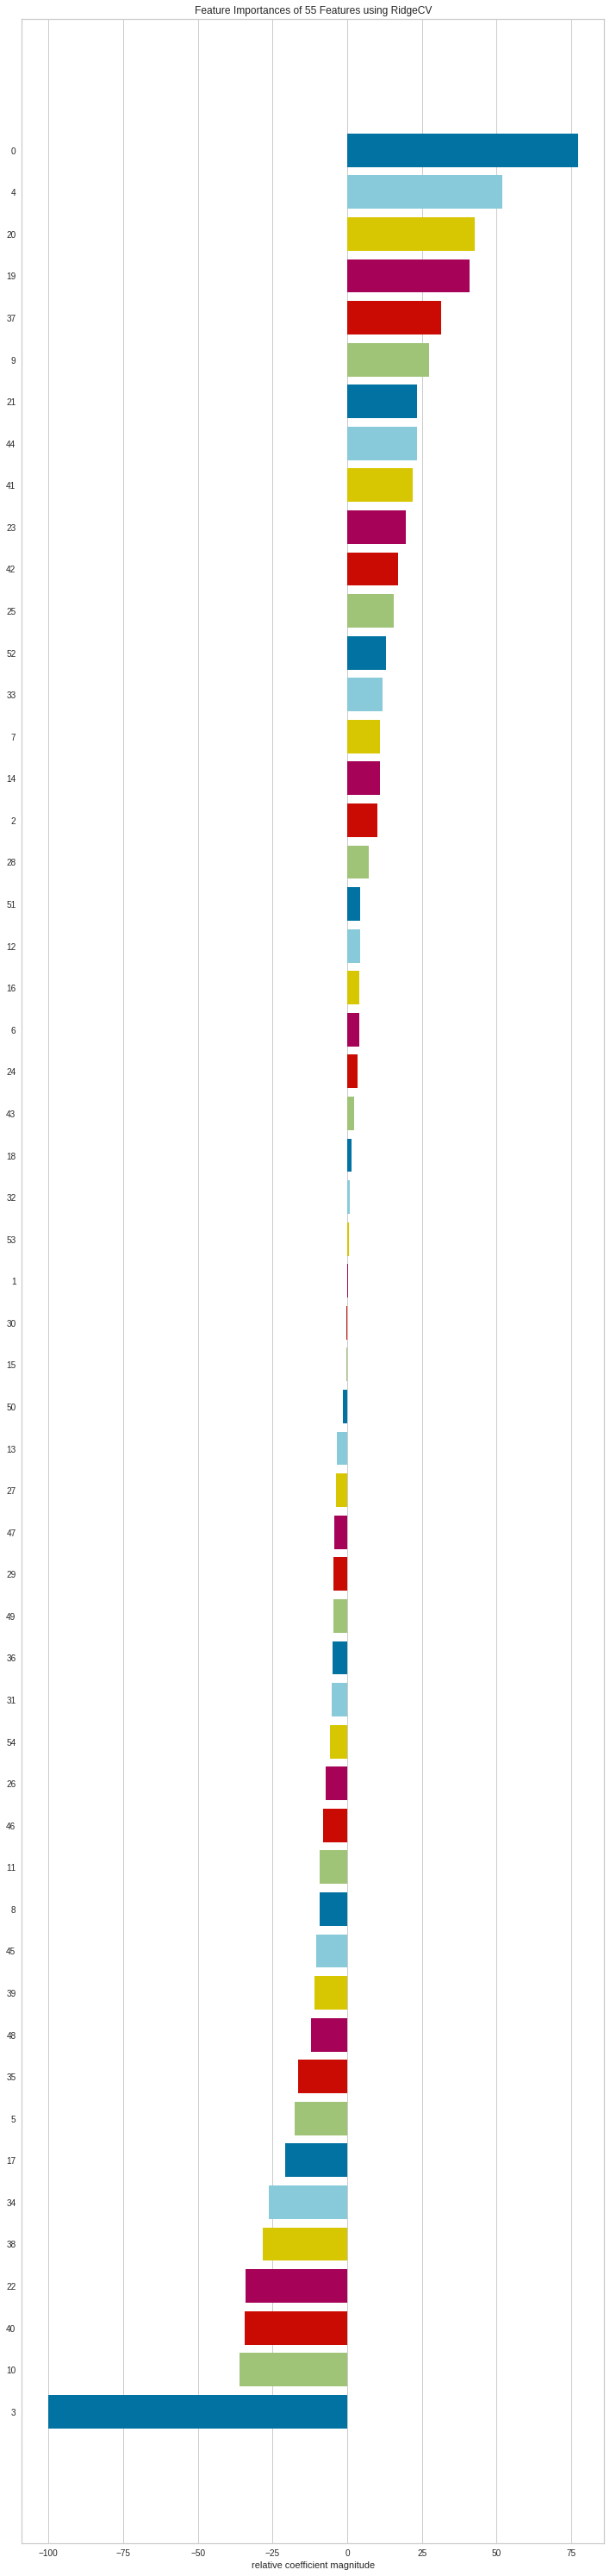

In [134]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

### Lasso 

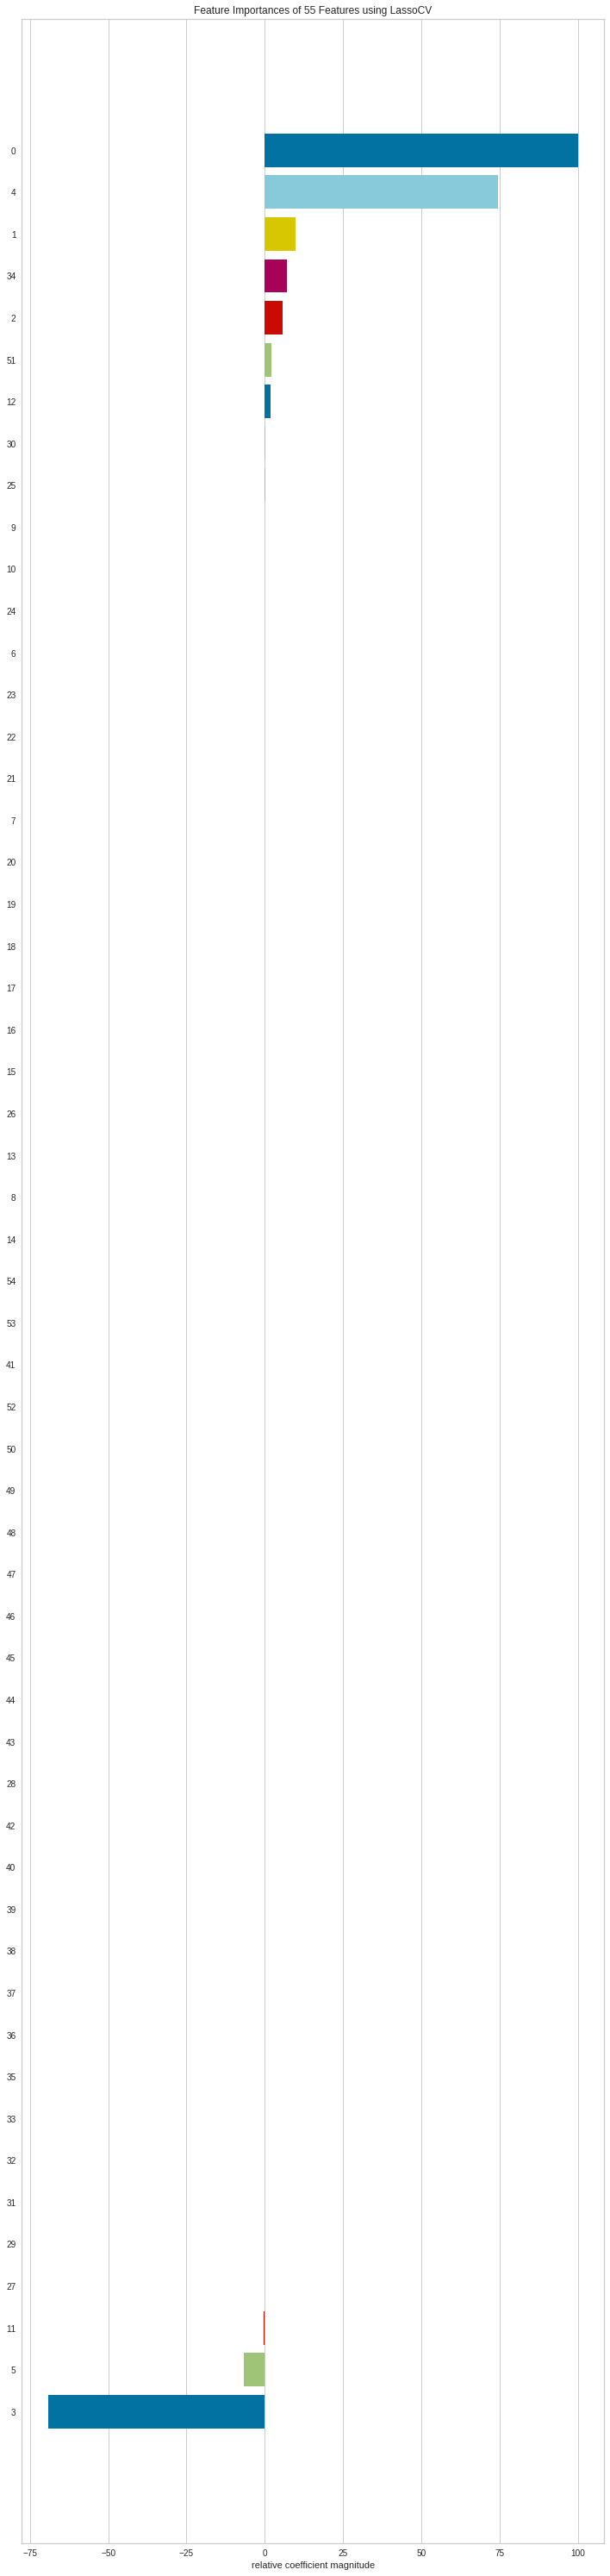

In [135]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()